In [1]:
#Import Thu Vien
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

#Tai Du Lieu Len Data Frame, dat ten la df
df = pd.read_csv('sales_data_sample.csv',header = 0, delimiter = ',', encoding = 'utf-8')
df.head()

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE
0,10107,30,2,2871.00,2/24/2003 0:00,Shipped,USA,Small
1,10121,34,5,2765.90,5/7/2003 0:00,Shipped,France,Small
2,10134,41,2,3884.34,7/1/2003 0:00,Shipped,France,Medium
3,10145,45,6,3746.70,8/25/2003 0:00,Shipped,USA,Medium
4,10159,49,14,5205.27,10/10/2003 0:00,Shipped,USA,Medium


In [2]:
#CAU1
import numpy as np
tuong_quan = np.corrcoef(df['QUANTITYORDERED'],df['SALES'])[0,1]
print(tuong_quan)

0.5514261919183568


In [3]:
#CAU5
df2=df.groupby('COUNTRY').sum()
df2.sort_values(by=['SALES'],ascending=False)

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,DEALSIZE
COUNTRY,,,,,,,
USA,10297362,35659,6369,3627982.83,2/24/2003 0:008/25/2003 0:0010/10/2003 0:0010/...,ShippedShippedShippedShippedShippedShippedShip...,SmallMediumMediumMediumSmallSmallMediumMediumM...
Spain,3513645,12429,2186,1215686.92,5/13/2005 0:005/28/2003 0:005/31/2005 0:005/13...,DisputedShippedIn ProcessDisputedDisputedShipp...,LargeLargeLargeMediumLargeMediumSmallMediumMed...
France,3223513,11090,2028,1110916.52,5/7/2003 0:007/1/2003 0:0011/11/2003 0:001/15/...,ShippedShippedShippedShippedShippedShippedShip...,SmallMediumSmallMediumMediumSmallLargeLargeMed...
Australia,1898841,6246,1181,630623.10,2/20/2004 0:0012/17/2004 0:0011/6/2003 0:007/1...,ShippedShippedShippedShippedShippedShippedShip...,MediumSmallLargeMediumMediumSmallSmallMediumSm...
UK,1476792,5013,1027,478880.46,4/8/2005 0:004/8/2005 0:006/12/2003 0:0011/14/...,ShippedShippedShippedShippedShippedShippedCanc...,SmallLargeMediumMediumMediumMediumMediumMedium...
Italy,1158239,3773,890,374674.31,8/17/2004 0:007/6/2004 0:0011/6/2003 0:009/9/2...,ShippedShippedShippedShippedShippedShippedShip...,LargeLargeLargeLargeLargeMediumSmallLargeLarge...
Finland,944808,3192,587,329581.91,9/30/2004 0:009/30/2004 0:0010/6/2003 0:001/31...,ShippedShippedShippedShippedShippedShippedShip...,SmallMediumMediumMediumSmallLargeMediumMediumM...
Norway,869325,2842,559,307463.70,11/18/2003 0:0010/15/2004 0:001/29/2003 0:0011...,ShippedShippedShippedShippedShippedShippedShip...,MediumMediumMediumMediumLargeMediumMediumMediu...
Singapore,806424,2760,544,288488.41,9/19/2003 0:009/19/2003 0:002/4/2004 0:006/15/...,ShippedShippedShippedShippedShippedShippedShip...,LargeMediumLargeMediumMediumLargeMediumMediumM...


In [4]:
#CAU6
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("QUANTITYORDERED ~ STATUS + DEALSIZE + STATUS:DEALSIZE",data=df).fit()
result = sm.stats.anova_lm(model,type=2)

print(result)

# 1.645e-09<0.05 => Có phụ thuộc

                     df         sum_sq       mean_sq           F  \
STATUS              5.0    3562.031394    712.406279   10.007876   
DEALSIZE            2.0   59596.757162  29798.378581  418.607297   
STATUS:DEALSIZE    10.0    4990.552353    499.055235    7.010722   
Residual         2806.0  199743.890933     71.184566         NaN   

                        PR(>F)  
STATUS            1.653628e-09  
DEALSIZE         8.014712e-160  
STATUS:DEALSIZE   5.933638e-11  
Residual                   NaN  


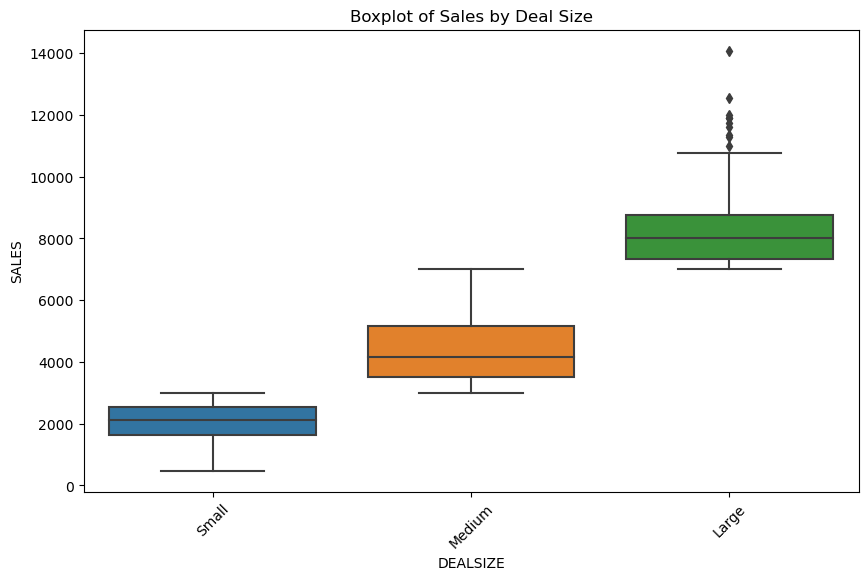

In [5]:
#CAU7
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ tệp CSV và lưu vào DataFrame (df)
df = pd.read_csv('sales_data_sample.csv')

# Vẽ boxplot theo kích thước đặt hàng (DEALSIZE)
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Boxplot of Sales by Deal Size')
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.show()


In [9]:
#CAU8
import scipy.stats as stats 
import numpy as np
# Tinh kurtosis
kurtosis = stats.kurtosis(df['ORDERLINENUMBER'])
# Dựa vào giá trị kurtosis để xác định mức độ
if kurtosis < 0:
    print ("Platykurtic")
elif kurtosis == 0:
    print ("Mesokurtic (Normal)")
else:
    print ("Leptokurtic")


Platykurtic


In [12]:
#CAU9
def absolute_maximum_scale(series):
    return series / series.abs().max()
for col in df.columns:
    df[col] = absolute_maximum_scale(df['SALES'])
print(df['SALES'].loc[100])


0.21232496378561083


In [ ]:
#CAU10
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

gb = df.groupby(['DEALSIZE'])['QUANTITYORDERED'].agg(['sum'])
labels = gb.index 
data = list(gb['sum'])
colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()


In [22]:
#CAu 18
import pandas as pd

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('sales_data_sample.csv')

# Sử dụng phương thức unique() để lấy danh sách các quốc gia đặt hàng và tính số lượng
number_of_countries = len(df['COUNTRY'].unique())

print(f"Số lượng quốc gia đặt hàng tại công ty ABC là: {number_of_countries}")


Số lượng quốc gia đặt hàng tại công ty ABC là: 19


In [23]:
#Cau 20
import pandas as pd

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('sales_data_sample.csv')

# Sử dụng phương thức groupby() và count() để đếm số dòng đặt hàng cho từng đơn hàng
order_line_counts = df.groupby('ORDERNUMBER')['ORDERLINENUMBER'].count()

# Tìm số dòng đặt hàng nhiều nhất
max_order_lines = order_line_counts.max()

print(f"Số dòng đặt hàng nhiều nhất trong đơn hàng là: {max_order_lines}")


Số dòng đặt hàng nhiều nhất trong đơn hàng là: 18


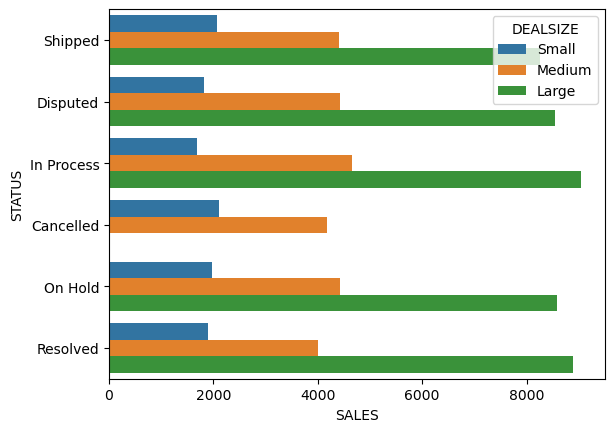

In [24]:
#CAU 21
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.barplot(x='SALES',y='STATUS',hue='DEALSIZE',data=df,errorbar=None)
plt.show()

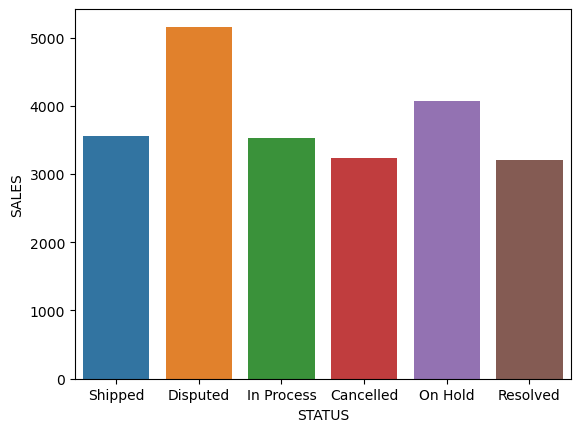

In [25]:
#CAU 22
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.barplot(x='STATUS',y='SALES',data=df,errorbar=None)
plt.show()

In [27]:
#CAU 24
import numpy as np 
log_data = np.log(df['SALES'])
print(df['SALES'])
print(log_data)

0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       5205.27
         ...   
2818    2244.40
2819    3978.51
2820    5417.57
2821    2116.16
2822    3079.44
Name: SALES, Length: 2823, dtype: float64
0       7.962416
1       7.925121
2       8.264708
3       8.228631
4       8.557427
          ...   
2818    7.716194
2819    8.288663
2820    8.597403
2821    7.657358
2822    8.032503
Name: SALES, Length: 2823, dtype: float64


In [28]:
# Tìm mã hóa đơn của đơn hàng có số dòng đặt hàng nhiều nhất
order_with_max_lines = order_line_counts[order_line_counts == max_order_lines]
order_numbers = order_with_max_lines.index.tolist()

print(f"Mã hóa đơn của đơn hàng có số dòng đặt hàng nhiều nhất là: {order_numbers}")


Mã hóa đơn của đơn hàng có số dòng đặt hàng nhiều nhất là: [10106, 10159, 10165, 10168, 10222, 10275, 10316, 10332, 10386, 10398]


In [30]:
df.shape


(2823, 8)

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('ORDERLINENUMBER ~ STATUS',data=df).fit()
aov_table = sm.stats.anova_lm(model,typ=1)
aov_table
#P_value<0.05 => có phụ thuộc

,df,sum_sq,mean_sq,F,PR(>F)
STATUS,5.0,376.584835,75.316967,4.241836,0.000762
Residual,2817.0,50017.934471,17.755745,NaN,NaN


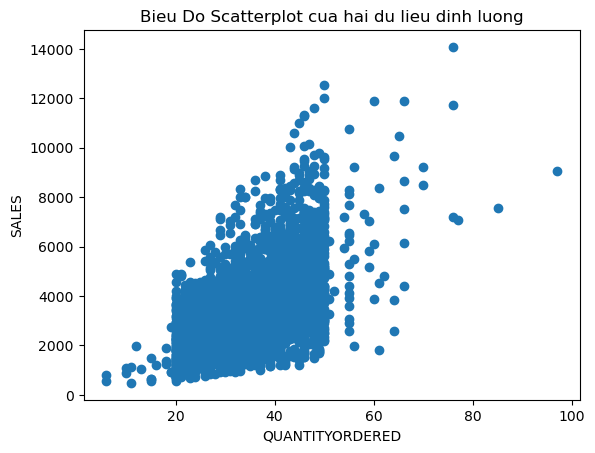

In [32]:
import matplotlib.pyplot as plt

X = df['QUANTITYORDERED']
Y = df['SALES']

plt.scatter(X,Y)

plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')

plt.title("Bieu Do Scatterplot cua hai du lieu dinh luong")

plt.show()

In [33]:
df[df['QUANTITYORDERED']==21].count()

ORDERNUMBER        103
QUANTITYORDERED    103
ORDERLINENUMBER    103
SALES              103
ORDERDATE          103
STATUS             103
COUNTRY            103
DEALSIZE           103
dtype: int64

In [35]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['STATUS'],df['DEALSIZE'])
chi2,p,dof,expected = chi2_contingency(contingency_table)

print("Gia tri chi_square",chi2)
print("Gia tri p-value",p)
print("Bac tu do",dof)
print("Gia tri du kien",expected)


Gia tri chi_square 34.344354882679596
Gia tri p-value 0.0001614574648411617
Bac tu do 10
Gia tri du kien [[3.33687566e+00 2.94155154e+01 2.72476089e+01]
 [7.78604322e-01 6.86362026e+00 6.35777542e+00]
 [2.28019837e+00 2.01006022e+01 1.86191994e+01]
 [2.44704215e+00 2.15713780e+01 1.99815799e+01]
 [2.61388594e+00 2.30421537e+01 2.13439603e+01]
 [1.45543394e+02 1.28300673e+03 1.18844988e+03]]


In [38]:
def min_max_scaling(series):
    return (series-series.min()) / (series.max()-series.min())
for col in df.columns:
    df[col] = min_max_scaling(df['SALES'])
print(df['SALES'].loc[50:59])

50    0.571492
51    0.142230
52    0.268965
53    0.846934
54    0.251044
55    0.169972
56    0.207757
57    0.346367
58    0.333417
59    0.233724
Name: SALES, dtype: float64


In [39]:
value = 10000
mean =df['SALES'].mean()

std = df['SALES'].std()

zscore = (value - mean) / std

print("gia tri cua",value,"la:",zscore)

gia tri cua 10000 la: 73840.16767409953


In [ ]:
ssss